# **Summer Olympics Data Analysis**

🔘 ***`Importing necessary Libraries`***

In [1]:
import pandas as pd                  # for data analysis and manipulation 
import numpy as np                   # for faster access operations with arrays
import matplotlib.pyplot as plt      # for plotting graphs

🔘 ***`Reading and displaying original data from the summer olympics csv file`***

In [2]:
df= pd.read_csv("summer.csv")       # df is short for 'data-frame';
                                    # stores data from csv file in the form of data-frame
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


🔘 ***`Fetching only the first 5 records/rows from the dataset`***

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


🔘 ***`Dimensions of the whole dataset`***

In [5]:
df.shape

(31165, 9)

🔘 ***`Analyzing presence of any NULL values in the dataset (column wise)`***

In [6]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

## **Analysis and Insights from the dataset so far**

**1. In how many cities Summer Olympics is held so far?**

In [7]:
print("Answer :",len(df['City'].unique()), end="\n\n")


Answer : 22



**2. Names of all Cities with their Medal Counts in Summer Olympics**

In [9]:
for city in df['City'].unique():
    print (f"{city}: {len(df[df['City']==city])}", end="\n\n")

Athens: 2149

Paris: 1396

St Louis: 470

London: 3567

Stockholm: 885

Antwerp: 1298

Amsterdam: 710

Los Angeles: 2074

Berlin: 875

Helsinki: 889

Melbourne / Stockholm: 885

Rome: 882

Tokyo: 1010

Mexico: 1031

Munich: 1185

Montreal: 1305

Moscow: 1387

Seoul: 1546

Barcelona: 1705

Atlanta: 1859

Sydney: 2015

Beijing: 2042



**2.Which sport is having most number of GOLD MEDALS so far?(Top 5)**

In [10]:
gold_medal = df[df.Medal=="Gold"]

gold_medals_sports = gold_medal.groupby("Sport").count()["Medal"].sort_values(ascending=False).head()

gold_medals_sports

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64

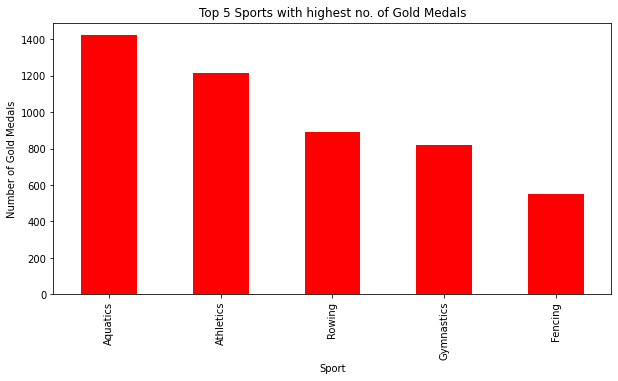

In [16]:
# Showing data in graphical form

print()

gold_medals_sports.plot(x='Sports', y='Gold Medals', kind='bar',ylabel = 'Number of Gold Medals', figsize = (10,5), title = 'Top 5 Sports with highest no. of Gold Medals', color = 'red')

**3. Which sport is having most number of medals so far? (Top 5)**

In [29]:
medals_sports = df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()

medals_sports

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

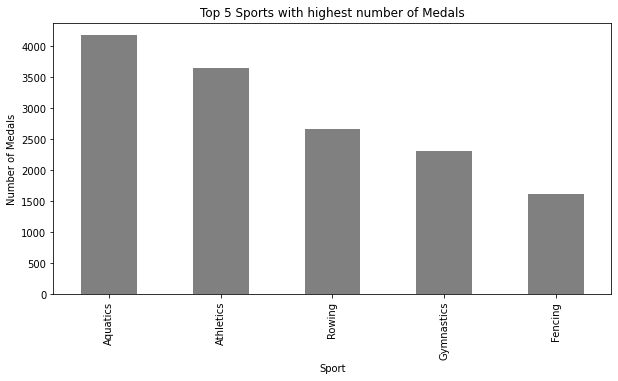

In [30]:
# Showing data in graphical form

print()

medals_sports.plot(x='Sports', y='Medals', kind='bar', ylabel = 'Number of Medals', figsize = (10,5), title = 'Top 5 Sports with highest number of Medals', color = 'grey')

**4. Which Player has won the most number of Medals? (Top 5)**

In [23]:
player_medals = df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()

player_medals

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

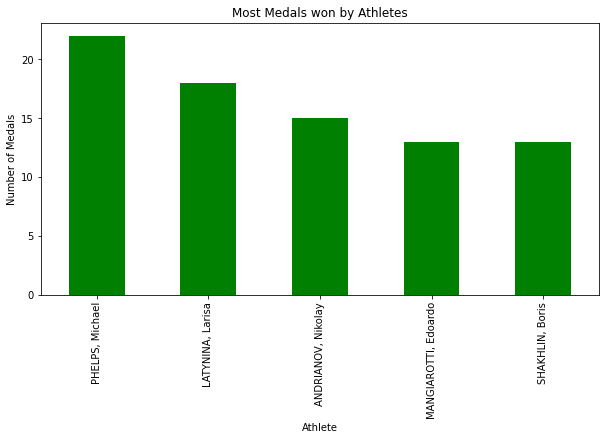

In [25]:
# Showing data in graphical form

print()

player_medals.plot(x='Athlete', y='Medals', kind='bar', ylabel= 'Number of Medals', figsize = (10,5), title = 'Most Medals won by Athletes', color = 'green')

**5. Which player has won the most number of GOLD MEDALS? (Top 5)**

In [31]:
gold_medal = df[df["Medal"]=='Gold']

player_gold_medals = gold_medal.groupby("Athlete").count()["Medal"].sort_values(ascending= False).head()

player_gold_medals

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

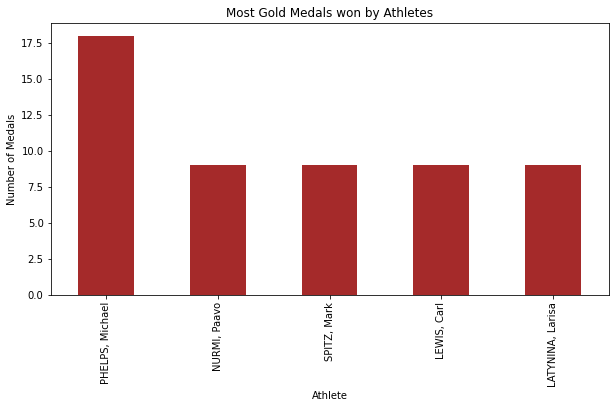

In [33]:
#Showing data in graphical form

print()

player_gold_medals.plot(x='Athletes', y='Medals', kind='bar', ylabel= 'Number of Medals', figsize = (10,5), title = 'Most Gold Medals won by Athletes', color = 'brown')

**6. In which year did India win its first Gold Medal in Summer Olympics?**

In [35]:
df_gold = df[df["Medal"]=="Gold"] 

df_India = df_gold[df_gold['Country'] == 'IND']

print(f"Answer: {df_India['Year'].min()}",end = "\n\n")

Answer: 1928



**7. Which Event is most popular in terms of number of players? (Top 5)**

In [36]:
event = df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head()

event

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

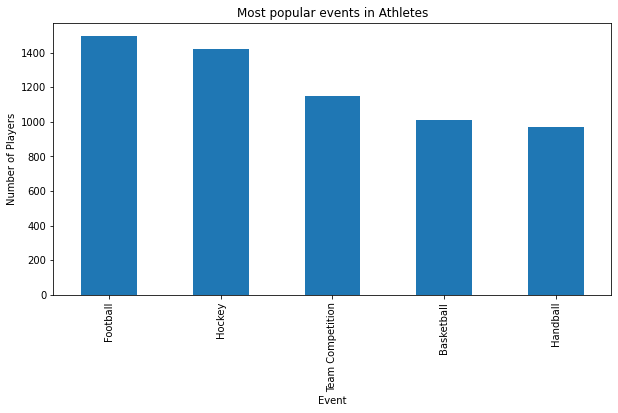

In [38]:
# graphical representation

print()

event.plot(x='Event', y='Number of Players', kind='bar', ylabel= 'Number of Players', figsize = (10,5), title = 'Most popular events in Athletes', )

**8. Which sport is having most Female Gold Medalists? (Top 5)**

In [44]:
df_female = df_gold[df_gold['Gender'] == 'Women']

female_gold_sports = df_female.groupby('Sport')['Gender'].count().sort_values(ascending = False).head()

female_gold_sports

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Gender, dtype: int64

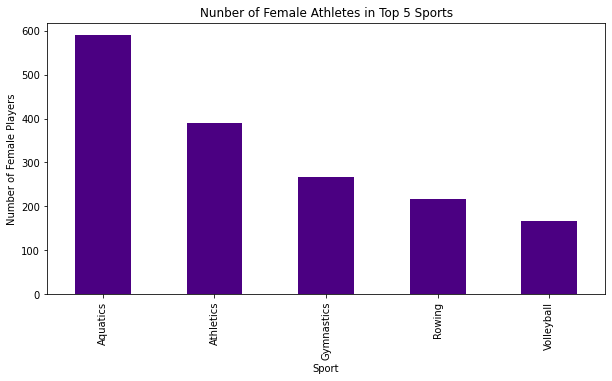

In [45]:
# graphical representation

print()

female_gold_sports.plot(x='Sport', y='Number of FemalePlayers', kind='bar', ylabel= 'Number of Female Players', figsize = (10,5), title = 'Nunber of Female Athletes in Top 5 Sports', color = 'indigo')